<a href="https://colab.research.google.com/github/Adisriman/AlexandriaRepo/blob/master/CNN_Fasion_MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf #tf tested with 1.14.0
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Fetch "Fashion MNIST" data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()


#scale of 0 to 1 each element in this dataset is a pixel value of 0 to 255, so
#we'll normalise/rescale these values
x_train=x_train/255.0
x_test=x_test/255.0

#Map for human readble class name
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
#in addition we have the classes 
print("Shape of Trraining Image Data:"+str(x_train.shape))
print("Shape of Trraining class Data:"+str(y_train.shape))
print("Shape of Test Image Data:"+str(x_test.shape))
print("Shape of Test class Data:"+str(y_test.shape))

Shape of Trraining Image Data:(60000, 28, 28)
Shape of Trraining class Data:(60000,)
Shape of Test Image Data:(10000, 28, 28)
Shape of Test class Data:(10000,)


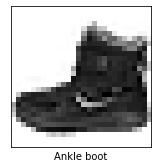

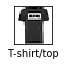

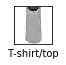

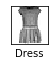

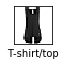

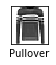

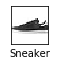

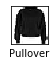

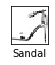

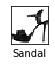

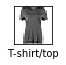

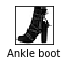

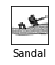

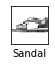

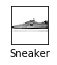

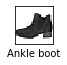

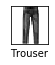

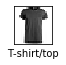

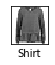

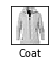

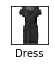

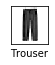

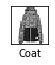

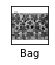

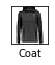

In [7]:
#visualize first 25 images from training data
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1) # at row only 5 images then move to next row
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
  
  plt.show()

In [8]:
# network,later by layer
model=tf.keras.models.Sequential()


# we start with a convolutional layer this will exrract feature from the
#input images by sliding c comvolution filter over the input image
#resulting in a feature map
model.add(
    tf.keras.layers.Conv2D(
        filters=32, #how many filters will learn
        kernel_size=(3,3),#Size of feture map that will slide over image
        strides=(1,1),#How the feature map "step" across the image
        activation='relu',#Rectified linear unit activation function
        input_shape=(28,28,1)#the expected input shape for this layer

    )
)
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2,2),# Size feature will be mapped to
        strides=(2,2)#How the pool
    )
)

#we'll now add a dropout layer. this fights overfitting and forces the model to
#learn multiple representations of the same data by randomly disabling neurons
#in the learning phase

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 #randomly disable 25% of neurons
    )
)

#output from previous layer is a 3d tensor. this must be flatterned to a 1d
# vector before beuing fed to the dense layers
model.add(
    tf.keras.layers.Flatten()
)

#A dense (interconnected) layer is added for mappimg the derived features 
#to the required class
model.add(
    tf.keras.layers.Dense(
        units=128, #output shape 
        activation='relu'#rectified linear unit activation function 
    )
)

#Final layer with 10 outputs 


model.add(
    tf.keras.layers.Dense(
        units=10, # output shape
        activation='softmax' # Softmax Activation function for multiclass classification 
    )
)

#Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, #loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy '] #reporting matrix 
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
